Test wine stuff. 
Try to group preprocessing, exploratory analysis, classification as well ordinal and regression into separate classes. 

Load data from file. 

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from wine_data import WineData
from wine_preprocesser import WinePreprocesser

# Load data and preprocess (everything you don't put in the pipeline)
data = WineData('../winequality-red.csv', '../winequality-white.csv')
X_red, y_red = data.load_red()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Look at the data. 
Get an idea for the feature distribution

ERROR! Session/line number was not unique in database. History logging moved to new session 28


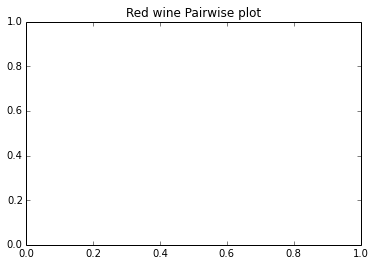

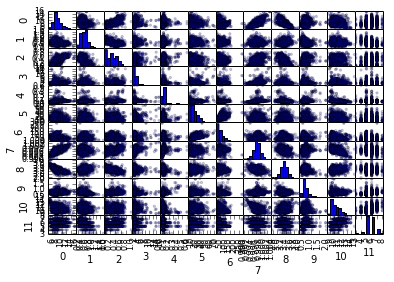

In [3]:
from wine_explore import pairs, plot2d
from matplotlib import pyplot as plt

# Plot pairwise featuer_i vs feature_j plot. 
pairs(X_red, y_red, 'Red wine').show() 

Interpretation: 
1. There are correlated features (e.g 0 and 7).
2. Many features are non-normal (e.g. 6). 

Visualize class separation in 2D (project on interesting 2D plane <- linear and non-linear transforms) 

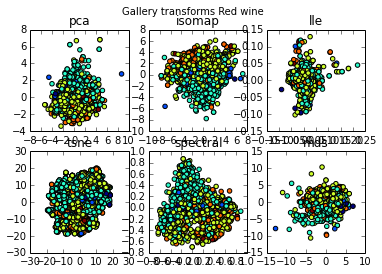

In [4]:
plot2d(X_red, y_red, embedding='gallery', title='Red wine').show()

Interpretation: 
1. Classes are not easily separapable in low-dimensional space. 
2. There is no obvious best transformation. 

Expand feature-space by simple feature engineering. 
1. Add features corresponding to 1/X_i. 
2. Expand by polynomial of rank 2. 
3. Remove features where all values are 1 (X_i * 1/X_i)

In [5]:
from wine_preprocesser import WinePreprocesser
wp = WinePreprocesser(data)
wp.add_divided_features(replace_inf_with_absmax=True)
wp.polynomial_expansion(rank=2)
wp.remove_low_variance_features(variance_threshold=0)
X_red, y_red = wp.get_red()
X_white, y_white = wp.get_white()

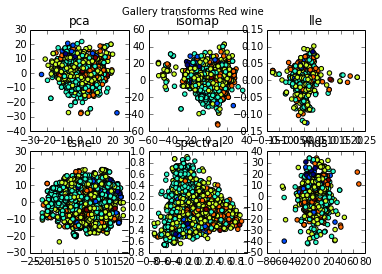

In [6]:
plot2d(X_red, y_red, embedding='gallery', title='Red wine').show()